# General overview

In [1]:
import pandas as pd
import matplotlib 
df = pd.read_json('../Data/academia3.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   votes          1537 non-null   int64 
 1   answers_count  1537 non-null   int64 
 2   closed         1537 non-null   bool  
 3   title          1537 non-null   object
 4   views          1537 non-null   int64 
 5   tags           1537 non-null   object
 6   asked          1535 non-null   object
 7   post_text      1537 non-null   object
 8   comments       1381 non-null   object
 9   answers        1537 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 109.7+ KB


In [3]:
df['asked'] = pd.to_datetime(df['asked'],utc= True)


In [4]:
mask =(df['asked'] < pd.to_datetime('2020-01-01 00:00Z', utc=True))
limited = df.loc[mask]

## Number of question per year
from 2012 till 2018

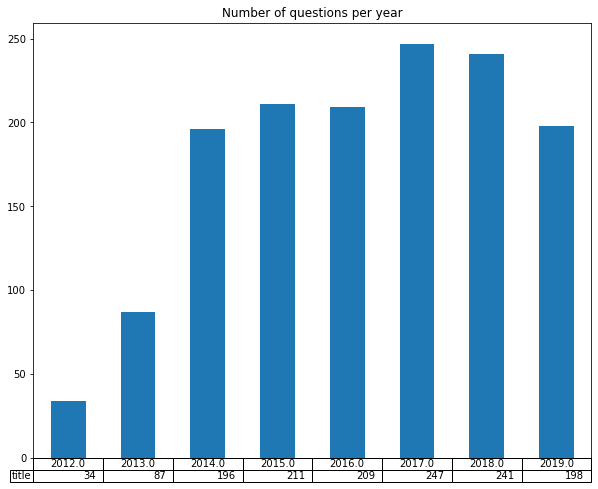

In [105]:
import matplotlib.pyplot as plt
trend_of_questions = limited['title'].groupby([df.asked.dt.year]).agg('count')
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
trend_of_questions.plot(ax = ax1,x='asked', y='answer_count', kind ='bar', figsize=(10,8), table= True, legend= False)
plt.title('Number of questions per year')
plt.savefig('./figures/number_of_question_per_year.png', bbox_inches='tight')
plt.show()


## Avarage count of question from 2012 till 2019

In [101]:
limited_statistics = limited.groupby([df.asked.dt.month.rename('month')]).describe()
limited_statistics.columns


MultiIndex([(        'votes', 'count'),
            (        'votes',  'mean'),
            (        'votes',   'std'),
            (        'votes',   'min'),
            (        'votes',   '25%'),
            (        'votes',   '50%'),
            (        'votes',   '75%'),
            (        'votes',   'max'),
            ('answers_count', 'count'),
            ('answers_count',  'mean'),
            ('answers_count',   'std'),
            ('answers_count',   'min'),
            ('answers_count',   '25%'),
            ('answers_count',   '50%'),
            ('answers_count',   '75%'),
            ('answers_count',   'max'),
            (        'views', 'count'),
            (        'views',  'mean'),
            (        'views',   'std'),
            (        'views',   'min'),
            (        'views',   '25%'),
            (        'views',   '50%'),
            (        'views',   '75%'),
            (        'views',   'max')],
           )

,count,mean,50%
month,,,
1.0,97.0,20.752577,8.0
2.0,110.0,14.418182,6.0
3.0,132.0,14.257576,6.0
4.0,109.0,18.743119,8.0
5.0,131.0,16.625954,10.0
6.0,129.0,17.697674,10.0
7.0,108.0,15.527778,6.5
8.0,118.0,13.855932,10.0
9.0,97.0,14.134021,8.0


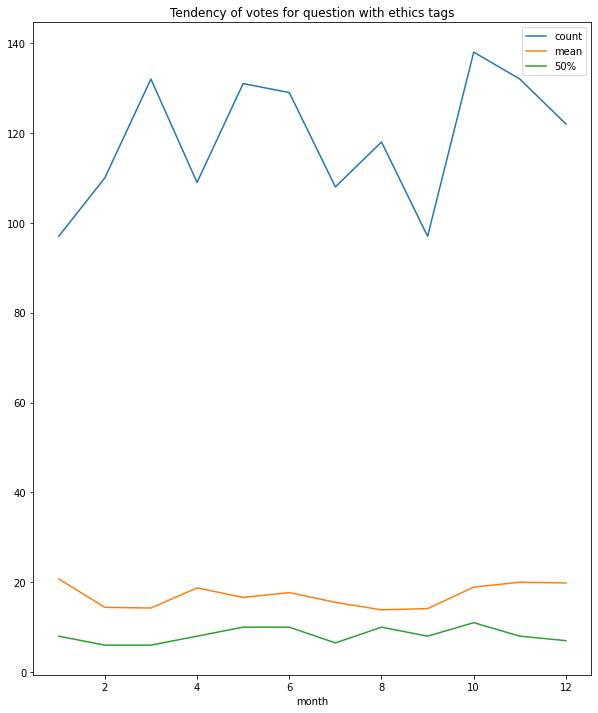

In [106]:
limited_statistics['votes'][['count','mean','50%']].plot(figsize=(10,12), title='Tendency of votes for question with ethics tags')
plt.savefig('./figures/tendency_of_votes_ethic.png', bbox_inches = 'tight')
limited_statistics['votes'][['count','mean','50%']]

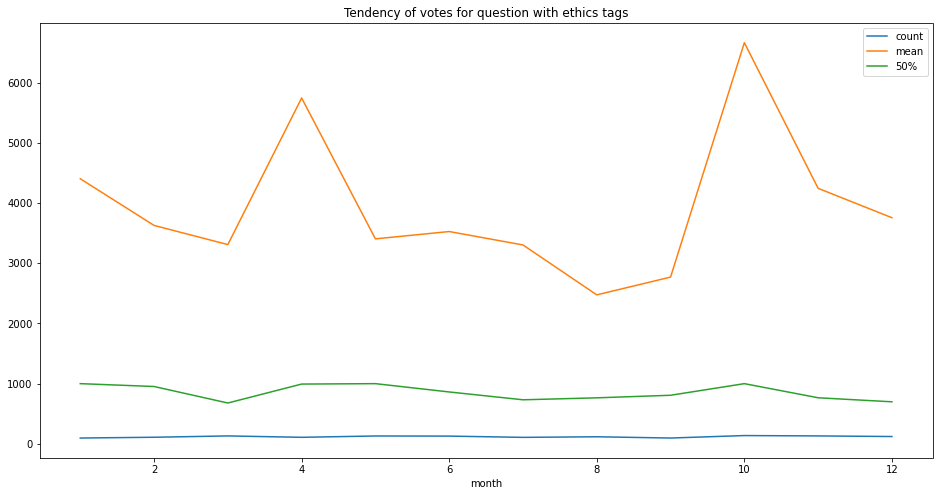

In [117]:
# ax1 = plt.axes()
# x_axis = ax1.axes.get_xaxis()
# x_axis.set_visible(False)
limited_statistics['views'][['count','mean','50%']].plot(figsize=(16,8), title='Tendency of votes for question with ethics tags')
# plt.savefig('./figures/tendency_of_votes_ethic.png', bbox_inches = 'tight')

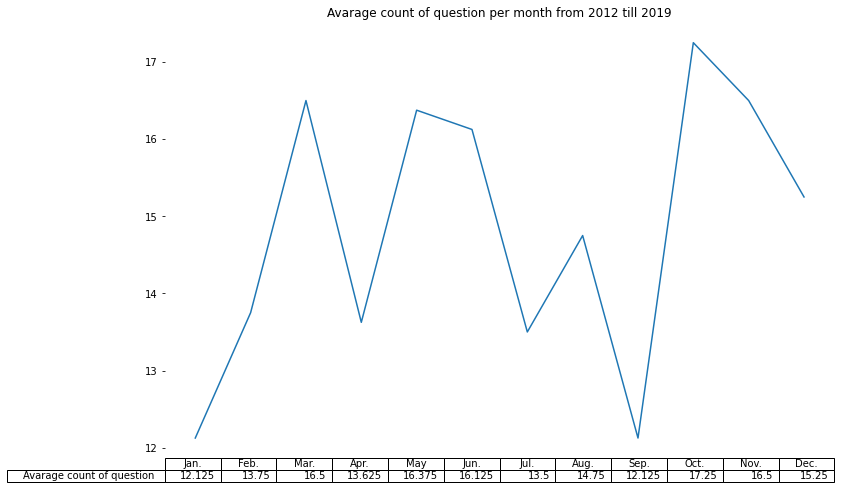

In [116]:
from pandas.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
avarege_q_month = limited['title'].groupby([df.asked.dt.month.rename('month')]).agg(count ='count')
avarege_q_month = avarege_q_month['count']/8
avarege_q_month

avarege_q_month = avarege_q_month.rename('Avarage count of question')
idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.',8.0: 'Aug.',9.0: 'Sep.', 10.0:'Oct.',11.0:'Nov.', 12.0:'Dec.'}

avarege_q_month = avarege_q_month.rename(index = idx)
avarege_q_month.plot(table= True, figsize=(12,8), use_index = True, title ='Avarage count of question per month from 2012 till 2019',
                   )
plt.savefig('figures/a_n_count.png', bbox_inches = 'tight')



## Count of question in year 2020
possible impact of coronavirus on number of question

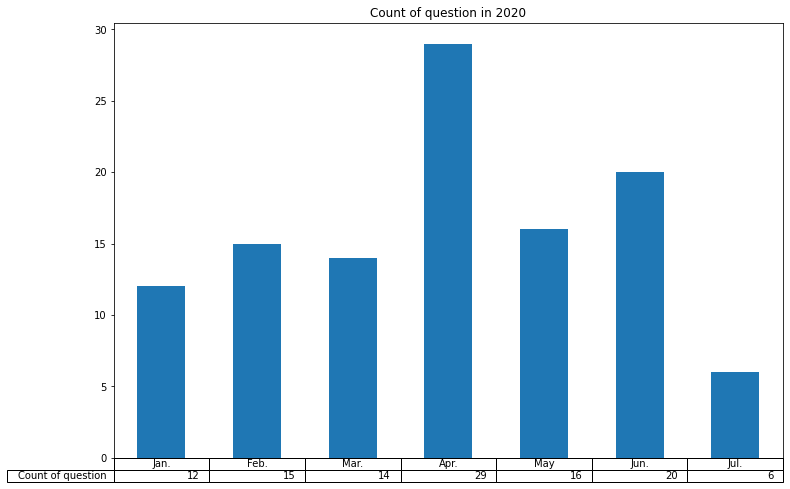

In [7]:
data2020= df.loc[(df['asked'] > pd.to_datetime('2020-01-01 00:00Z', utc=True))]
data2020 = data2020['title'].groupby([df.asked.dt.month.rename('month')]).agg(count = 'count')

idx = {1.0:'Jan.',2.0: 'Feb.',3.0: 'Mar.',4.0: 'Apr.',5.0: 'May',6.0:'Jun.',7.0:'Jul.'}
data2020 = data2020.rename(index = idx,columns = {'count':'Count of questions'})
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
data2020.plot(ax = ax1,table= True, kind= 'bar', figsize=(12,8), title ='Count of question in 2020', legend = False,)
# where df is your data frame
plt.savefig('./figures/tabl2020.png', bbox_inches='tight',)


## The most frequent tags in question

In [8]:
import collections
top = 20
all_tags = []
for a in df['tags']:
    all_tags += a

cnt_all = collections.Counter(all_tags)
cnt_all.most_common()

commont_dict ={}

for w,f in cnt_all.most_common():
    commont_dict[w] = f


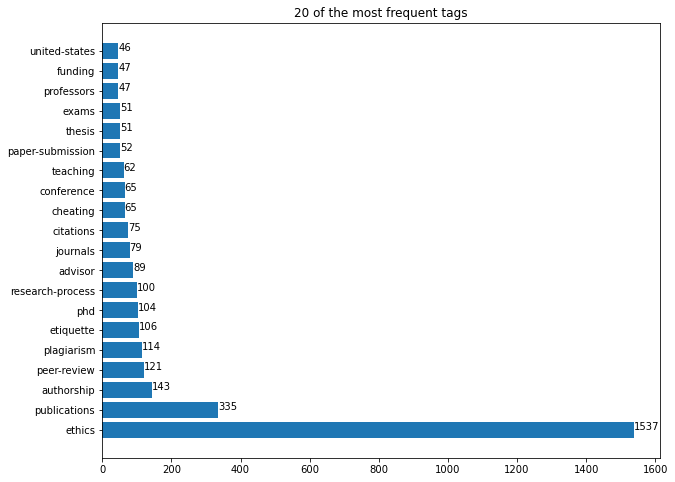

In [9]:
n = 20
df_coocurences = pd.DataFrame.from_dict(dict(cnt_all), columns=[ 'Number of occurences'], orient='index')
df_coocurences.sort_values(by='Number of occurences',ascending = False, inplace= True)
# df_coocurences.head(15).plot(kind = 'barh', figsize=(10,10))
data = df_coocurences.head(n)
plt.figure(figsize=(10,8))
plt.barh(data.index,data['Number of occurences'])

plt.title(str(n)+' of the most frequent tags')
for index, value in enumerate(data['Number of occurences']):
    plt.text(value, index, str(value))
plt.savefig('./figures/most_frequenta_tags',bbox_inches='tight')

## Function for WordCloud, possibly used for presentation


In [10]:
from wordcloud import WordCloud
def word_cloud(data_dict, name):
    cloud = WordCloud(
            background_color='white',
            width=2500,
            height=1800,
            max_words=top,
            min_font_size=25,
            colormap='tab10',
            color_func=lambda *args, **kwargs: "black",
            prefer_horizontal=1.0)
    cloud.generate_from_frequencies(data_dict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.savefig('./figures/' + name)
    plt.show()

In [11]:
import json
with open("most_common_tags.json", "w") as fp:
    json.dump(commont_dict,fp) 


In [12]:
import collections
top = 20
all_tags = []

for a in df.loc[df['closed'] == True]['tags']:
    all_tags += a

cnt = collections.Counter(all_tags)

closed = {}
for w,f in cnt.most_common(top):
    closed[w] = f
del closed['ethics']
cnt.most_common(10)

[('ethics', 117),
 ('publications', 12),
 ('cheating', 9),
 ('etiquette', 9),
 ('exams', 8),
 ('phd', 8),
 ('research-process', 7),
 ('authorship', 7),
 ('plagiarism', 7),
 ('professors', 7)]

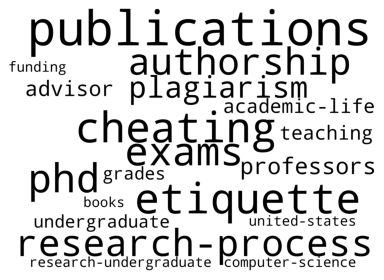

In [13]:
word_cloud(closed,'closed_wc.png')

## Basic statistics for answercount, votes, views

In [14]:
df['answers_count'].describe()

count    1537.000000
mean        3.181522
std         2.914846
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        23.000000
Name: answers_count, dtype: float64

In [15]:
df['votes'].describe()

count    1537.000000
mean       16.760573
std        26.828350
min        -8.000000
25%         3.000000
50%         8.000000
75%        19.000000
max       329.000000
Name: votes, dtype: float64

In [16]:
df['views'].describe()

count      1537.000000
mean       3870.839948
std       10246.859754
min          27.000000
25%         300.000000
50%         825.000000
75%        4000.000000
max      269000.000000
Name: views, dtype: float64

## Rate of positively and negative evalueted question for N od most frequent tags

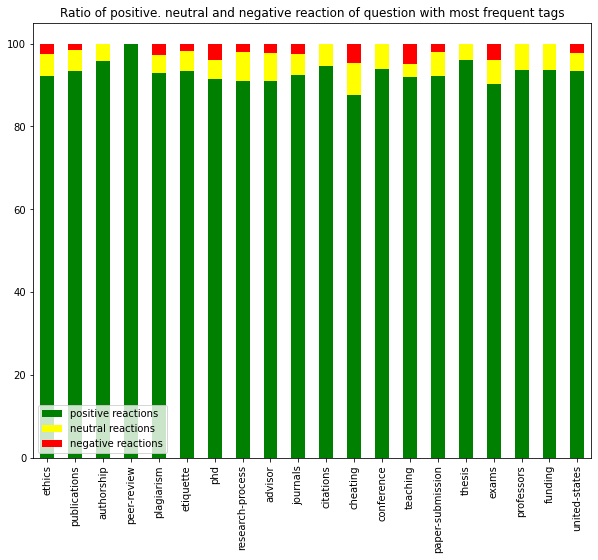

In [120]:
import json
all_tags = []
for a in df.loc[df['votes']> 0]['tags']:
    all_tags += a
cnt_positive = collections.Counter(all_tags)
cnt_positive.most_common(10)
positive_dict = {}
for w,f in cnt_positive.most_common():
    positive_dict[w] = f



all_tags = []
for a in df.loc[df['votes']< 0]['tags']:
    all_tags += a  
cnt_negative = collections.Counter(all_tags)

negative_dict = {}
for w,f in cnt_negative.most_common():
    negative_dict[w] = f

result = {}
for k, v in commont_dict.items():
    neg_rate = 0
    pos_rate = 0
    if k in negative_dict.keys():
        neg_rate = (negative_dict[k] / v)*100
    if k in positive_dict.keys():
        pos_rate = (positive_dict[k] / v) *100
    neut_rate = 100 - neg_rate - pos_rate
    result[k] = {
        'positive reactions' : round(pos_rate,2),
        'neutral reactions' :round(neut_rate,2),
        'negative reactions': round(neg_rate,2)
    }
    
n_most_frequent_tags = data.index
with open('most_frequent_tags.json','w') as f:
    json.dump(n_most_frequent_tags.tolist(),f, ensure_ascii = False)

result_for_n = { your_key: result[your_key] for your_key in n_most_frequent_tags }
result_for_n = pd.DataFrame.from_dict(result_for_n, orient='index')
result_for_n['idx'] = result_for_n.index
ax = result_for_n['positive reactions'].plot( kind="bar", color='green', figsize=(10,8), title='Ratio of positive. neutral and negative reaction of question with most frequent tags',
                                            legend= True)
result_for_n['neutral reactions'].plot(kind='bar', color='yellow',bottom=result_for_n['positive reactions'],legend= True)
result_for_n['negative reactions'].plot(kind='bar', color='red', bottom=result_for_n['neutral reactions']+result_for_n['positive reactions'],
                                       legend= True)

plt.savefig('./figures/ratio_ofreaction_on question.png')

## Basic Statistics of views for every tag

In [60]:
import itertools
import numpy as np
unique_tags = np.unique([*itertools.chain.from_iterable(df.tags)])

avarage_views_per_tag = pd.DataFrame()
for t in unique_tags:
    mask = df.tags.apply(lambda x:  t in x)
    subset_df = df[mask]

    description = subset_df['views'].describe()
    avarage_views_per_tag[t] = description
    
avarage_views_per_tag = avarage_views_per_tag.T
avarage_views_per_tag['tag'] = avarage_views_per_tag.index
avarage_views_per_tag.sort_values(by=['50%','mean'], ascending = False)

avarage_views_per_tag.loc['publications',:]


count             335
mean          2512.99
std           4945.72
min                31
25%             276.5
50%               717
75%              3000
max             50000
tag      publications
Name: publications, dtype: object

## How statistic for tags have changed in time


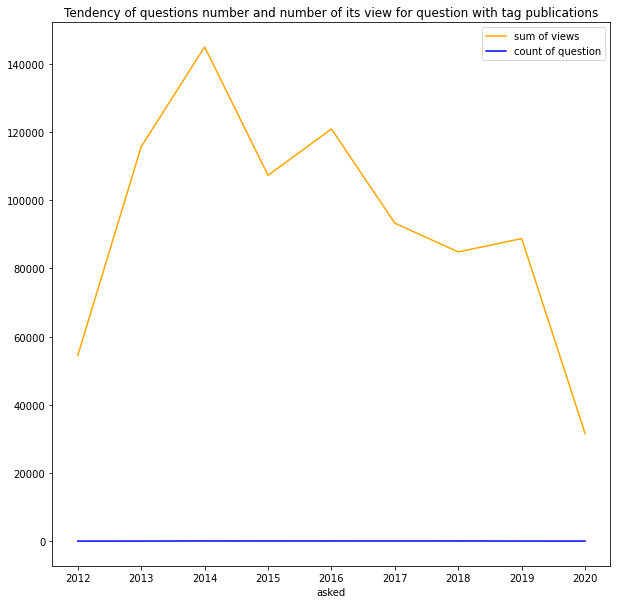

In [88]:
item = 'publications'
pub_views = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].sum()
pub_views = pub_views.rename('sum of views')
pub_count = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['title'].count()
pub_count = pub_count.rename('count of question')

ax = pub_views.plot(color = 'orange', legend = True, figsize = (10,10))
pub_count.plot(color = 'blue', figsize = (10,10), legend = True, title = 'Tendency of questions number and number of its view for question with tag ' + item)
plt.savefig('./figures/tendecy_publications.png',bbox_inches = 'tight')


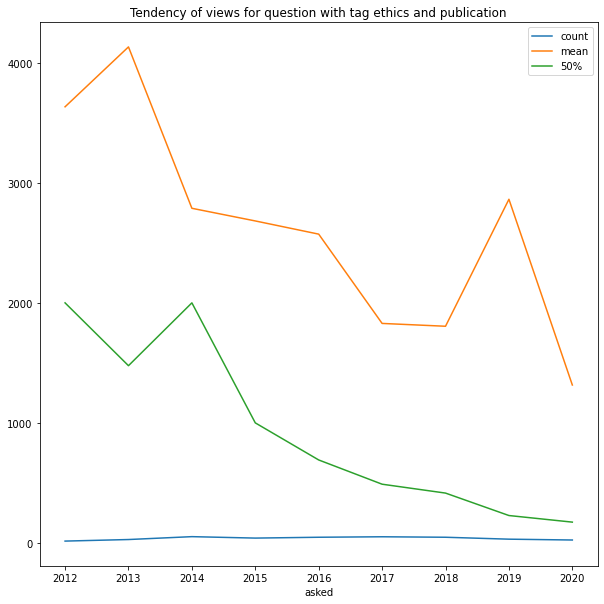

In [87]:
views_describe = df.loc[df.apply(lambda x :  item in x['tags'],axis=1)].groupby([df.asked.dt.year])['views'].describe()
views_describe[['count','mean','50%']].plot(figsize =(10,10), title = 'Tendency of views for question with tag ethics and publication')
plt.savefig('./figures/t_vies_publications',bbox_inches = 'tight')